# Understading the Area Problem

In the study of differential calculus, we become familiar with using tangents and solving velocity problems to introduce the concept of the derivative. However, to introduce the definite integral, we must shift our focus to area and distance problems. This notebook will concentrate entirely on the area problem, marking the beginning of a broader exploration of integral calculus. In particular, this section will delve into the elementary concepts that form the basic building blocks of integral calculus.

## Understanding what area is, in a general sense

Generally, our understanding of area is clearly defined for shapes with straight sides, such as polygons, as we can deconstruct them into simpler shapes or polygons that are easier to work with. However, this clarity changes when dealing with a function that curves; we cannot perfectly split it into regions with straight sides.

To handle these irregular, curved functions, we need to establish a method that accommodates all possible scenarios that could arise with a function. This approach is similar to how we defined a method for differentiation: by defining the tangent, we approximated the slope of the tangent line using secant lines and then took the limit of these approximations. We will apply this concept of approximations and limits to establish a similar method for area. 

## Example 1: Use rectangles to estimate the area under the parabola: $$y = x^{2}\tag{1.0}$$ from 0 to 1.

### Solution:

Since the question stipulates that our domain spans between 0 and 1, we can assume that the area under the curve, 𝑆, does not exceed 1. However, this estimation of the area is not sufficiently representative, especially when you examine the figure below illustrating area 𝑆. Clearly, we can improve our approximation by finding a way to partition the area under the curve using a method that is easily calculable. In the following cells, you will see different ways to partition this curve into various regions, specifically in the form of rectangles.

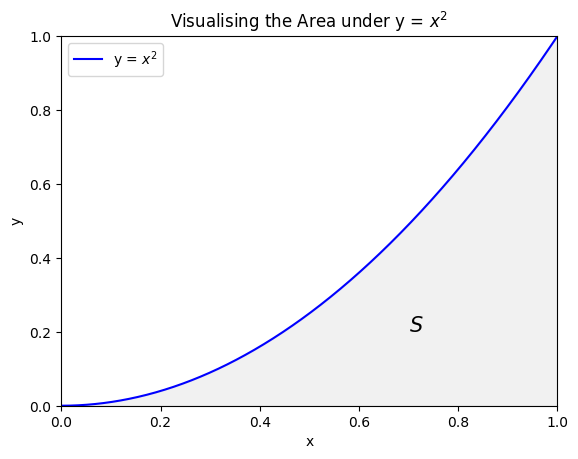

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate y = x^2 

def positive_quadratic(x):
    return x**2

# Define the range of x values

x = np.linspace(0, 1, 1000)
y = positive_quadratic(x)

# Plotting the curve

plt.plot(x, y, label='y = $x^2$', color='blue')

# Filling in the area under the curve and label it as S

plt.fill_between(x, y, color='lightgrey', alpha=0.3)
plt.text(0.7, 0.2, '$S$', fontsize=15, color='black')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualising the Area under y = $x^2$')
plt.legend()

# Set y-axis limit to start from 0
plt.ylim(0, max(y))

# Adjust margins to reduce padding
plt.margins(x=0, y=0)

# Show the plot
plt.show()

### Breaking down the problem

Suppose we divide 𝑆 into 10 strips, $S_i$,where 𝑖 represents the index of each strip, ranging from 1 to 10. Each strip $S_i$ corresponds to a specific interval on the x-axis, and the height of each strip is determined by the value of the curve $y = {x^2}$ at the corresponding x-coordinate. By examining these strips, we can approximate the total area 𝑆 under the curve as the sum of the areas of these individual strips. This method of partitioning the area helps to visualise the concepts we mentioned earlier, aiding us in understanding integration as the sum of smaller, manageable sections.

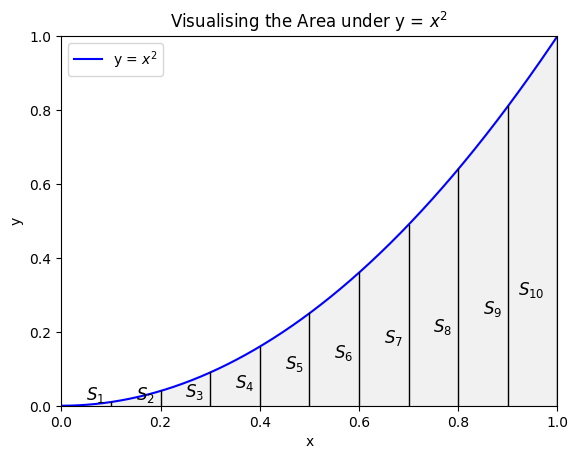

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate y = x^2 

def positive_quadratic(x):
    return x**2

# Define the range of x values

x = np.linspace(0, 1, 1000)
y = positive_quadratic(x)

# Number of partitions/Regions

n_partitions = 10
x_partitions = np.linspace(0, 1, n_partitions+1)
y_partitions = positive_quadratic(x_partitions)

# Plotting the curve

plt.plot(x, y, label='y = $x^2$', color='blue')

# Filling in the area under the curve and labelling the different regions 


plt.fill_between(x, y, color='lightgrey', alpha=0.3)
plt.text(0.05, 0.015, '$S_1$', fontsize=12, color='black')
plt.text(0.15, 0.015, '$S_2$', fontsize=12, color='black')
plt.text(0.25, 0.025, '$S_3$', fontsize=12, color='black')
plt.text(0.35, 0.05, '$S_4$', fontsize=12, color='black')
plt.text(0.45, 0.1, '$S_5$', fontsize=12, color='black')
plt.text(0.55, 0.13, '$S_6$', fontsize=12, color='black')
plt.text(0.65, 0.17, '$S_7$', fontsize=12, color='black')
plt.text(0.75, 0.2, '$S_8$', fontsize=12, color='black')
plt.text(0.85, 0.25, '$S_9$', fontsize=12, color='black')
plt.text(0.92, 0.3, '$S_{10}$', fontsize=12, color='black')
# Adding vertical lines for partitions 
for i in range(len(x_partitions)):
    plt.plot([x_partitions[i], x_partitions[i]], [0, y_partitions[i]], color='black', linewidth=1)
    
# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualising the Area under y = $x^2$')
plt.legend()

# Set y-axis limit to start from 0
plt.ylim(0, max(y))

# Adjust margins to reduce padding
plt.margins(x=0, y=0)

# Show the plot
plt.show()


### Working out an estimate

A simple shape that we can easily work with is a rectangle. By following the vertical lines shown in the previous figure, we can use rectangles to estimate the area. We approximate each strip by a rectangle that has the same base as the strip and whose height matches the left edge of the strip. In other words, the heights of these rectangles correspond to the values of the function $f(x) = {x^2}$ at the left end points of the subintervals $[0, \frac{1}{10}]$, $[\frac{1}{10}, \frac{2}{10}]$, $[\frac{2}{10}, \frac{3}{10}]$, $[\frac{3}{10}, \frac{4}{10}]$, $[\frac{4}{10}, \frac{5}{10}]$, $[\frac{5}{10}, \frac{6}{10}]$, $[\frac{6}{10}, \frac{7}{10}]$, $[\frac{7}{10}, \frac{8}{10}]$, $[\frac{8}{10}, \frac{9}{10}]$, $[\frac{9}{10}, 1]$. 

Each rectangle has a width of 0.1, and the heights of these rectangles correspond to the squared values. If we denote $L_{10}$ as the sum of the areas of these approximating rectangles, then we are dealing with what I term an "underestimate." This scenario is represented using the following formula:            
<center> $$L_{10} = \sum_{i=0}^9 f(x_i) \cdot \text{width}\tag{2.1}$$</center>

We can perform an analogous operation to generate an overestimate. To do this, we start similarly to the previous method, but in this case, the height of each rectangle is taken from the right edge of each vertical strip of ${S_i}$.  Using the same subintervals as before, we can create another formula that can used to essentially find the upper bound of our area approximation: 

<center>$$R_{10} = \sum_{i=0}^9 f(x_{i+1}) \cdot \text{width}\tag{2.2}$$</center>

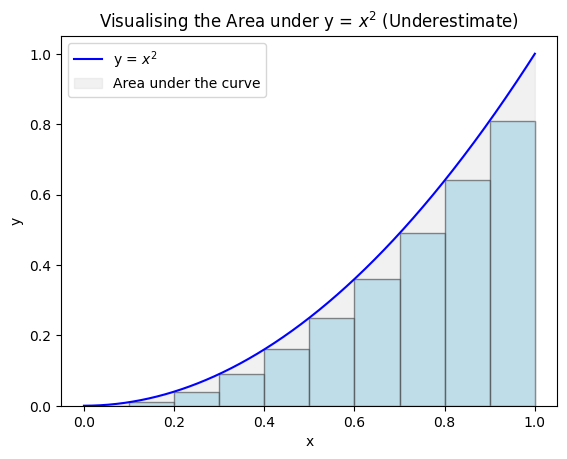

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate y = x^2

def positive_quadratic(x):
   return x**2

# Define the range of x values

x = np.linspace(0, 1, 1000)
y = positive_quadratic(x)

# Number of recentagles (the more, the better the approximation)
n_rectangles = 10
x_rect = np.linspace(0, 1, n_rectangles + 1)
y_rect = positive_quadratic(x_rect)
width = 1 / n_rectangles

# Plotting the curve

plt.plot(x, y, label='y = $x^2$', color='blue') 

# Visualising rectangles ( Riemann sum approximation)
for i in range(n_rectangles): 
   plt.bar(x_rect[i], y_rect[i], width=width, align= 'edge', edgecolor='black', color = 'skyblue', alpha = 0.6)

# Filling the area under the curve from 0 to 1
plt.fill_between(x, y, color='lightgrey', alpha = 0.3, label='Area under the curve')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualising the Area under y = $x^2$ (Underestimate)')
plt.legend()

# Show the plot
plt.show()

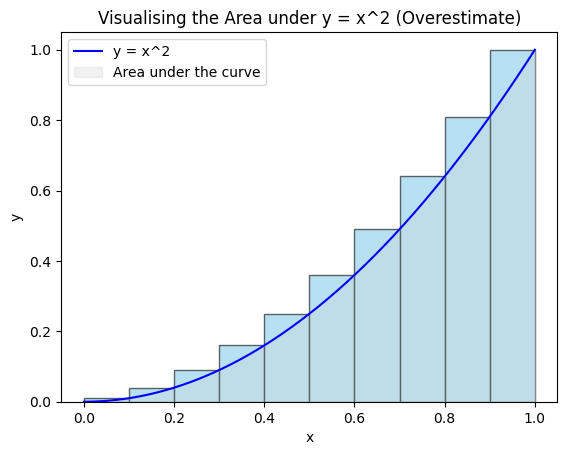

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate y = x^2

def positive_quadratic(x):
   return x**2

# Define the range of x values

x = np.linspace(0, 1, 1000)
y = positive_quadratic(x)

# Number of recentagles (the more, the better the approximation)
n_rectangles = 10
x_rect = np.linspace(1 / n_rectangles, 1, n_rectangles)  # Right endpoints of each interval)
y_rect = positive_quadratic(x_rect)
width = 1 / n_rectangles

# Plotting the curve

plt.plot(x, y, label='y = x^2', color='blue') 

# Visualising rectangles ( Riemann sum approximation)
for i in range(n_rectangles):
    plt.bar(x_rect[i] - width, y_rect[i], width=width, align='edge', edgecolor='black', color='skyblue', alpha=0.6)

# Filling the area under the curve from 0 to 1
plt.fill_between(x, y, color='lightgrey', alpha = 0.3, label='Area under the curve')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Visualising the Area under y = x^2 (Overestimate)')
plt.legend()

# Show the plot
plt.show()

### The answers generated

Computing the answers generated for both $L_{10}$ and $R_{10}$, we get a possible range for our area, S. 

<center>$$L_{10} < A < R_{10}\tag{3.0}$$</center>
<center>$$L_{10} = \sum_{i=0}^9 f(x_i) \cdot \text{width} < A < R_{10} = \sum_{i=0}^9 f(x_{i+1}) \cdot \text{width}\tag{3.1}$$</center>

In order to compute the following answers we used the code featured below to generate the answers

<center>$$0.2850000000000001 < A < 0.38500000000000006 \tag{3.2}$$</center>

The more rectangles we use the more precise our approximation turns out to be. I am sure for those who have explored limits regarding tangents when dealing with derivatives, can begin to understand how we may start to formulate a more defined way at approaching the Area problem.

In [5]:
# Define the function
def f(x):
    return x**2

# Number of subintervals 
n = 10

# Width of each intervals
width = 1/n

# Left endpoints
x_valuesL = [i * width for i in range(n)]

# Rigth endpoints 
x_valuesR = [i * width for i in range(n+1)]

# Sum of the areas of the rectangles

L_10 = sum(f(x) * width for x in x_valuesL)
R_10 = sum(f(x) * width for x in x_valuesR)

print(L_10,"< A <" , R_10)

0.2850000000000001 < A < 0.38500000000000006
